In [3]:
!pip install nltk
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [4]:
import pandas as pd

##**load dataset**##

In [5]:
data = pd.read_csv("TikTokShop.csv")

In [6]:
data.head()

,full_text
0,@mazzini_gsp Udah bener ilangin tuh marketplac...
1,@mazzini_gsp Kalau tiktok udh tdk bisa daiajak...
2,@mazzini_gsp Sebaiknya pemerintah membuat apk ...
3,@mazzini_gsp alfmrt sama indmrt udah join the ...
4,@mazzini_gsp Gak lah... Toh tanpa tik tok pun ...


# **Casefolding**

In [7]:
df = data

In [8]:
import string
import re

In [9]:
def preprocess_text(sentence):
    if isinstance(sentence, str):
        # Mengubah kalimat menjadi huruf kecil
        lower_case = sentence.lower()

        # Menghapus angka dari kalimat
        result = re.sub(r"\d+", "", lower_case)

        # Menghapus URL
        result = re.sub(r"(http|https)://\S+", "", result)

        # Menghilangkan tanda baca
        result = re.sub(r"[^\w\s]", "", result)

        # Menghilangkan karakter HTML
        result = re.sub('<.*?>', ' ', result)

        # Mengganti line baru dengan spasi
        result = re.sub("\n", " ", result)

        # Menghapus kata-kata tunggal
        result = re.sub(r"\b[a-zA-Z]\b", "", result)

        # Memisahkan dan menggabungkan kata
        result = ' '.join(result.split())

        return result
    else:
        return sentence


In [10]:
df['clean'] = df['full_text'].apply(preprocess_text)
df.head()

,full_text,clean
0,@mazzini_gsp Udah bener ilangin tuh marketplac...,mazzini_gsp udah bener ilangin tuh marketplace...
1,@mazzini_gsp Kalau tiktok udh tdk bisa daiajak...,mazzini_gsp kalau tiktok udh tdk bisa daiajak ...
2,@mazzini_gsp Sebaiknya pemerintah membuat apk ...,mazzini_gsp sebaiknya pemerintah membuat apk a...
3,@mazzini_gsp alfmrt sama indmrt udah join the ...,mazzini_gsp alfmrt sama indmrt udah join the g...
4,@mazzini_gsp Gak lah... Toh tanpa tik tok pun ...,mazzini_gsp gak lah toh tanpa tik tok pun prod...


# **Tokenizing**

In [11]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [12]:
def tokenize_text(kalimat):
  tokens = nltk.tokenize.word_tokenize(kalimat)
  return tokens

In [13]:
df['token'] = df['clean'].apply(tokenize_text)
df.head()

,full_text,clean,token
0,@mazzini_gsp Udah bener ilangin tuh marketplac...,mazzini_gsp udah bener ilangin tuh marketplace...,"[mazzini_gsp, udah, bener, ilangin, tuh, marke..."
1,@mazzini_gsp Kalau tiktok udh tdk bisa daiajak...,mazzini_gsp kalau tiktok udh tdk bisa daiajak ...,"[mazzini_gsp, kalau, tiktok, udh, tdk, bisa, d..."
2,@mazzini_gsp Sebaiknya pemerintah membuat apk ...,mazzini_gsp sebaiknya pemerintah membuat apk a...,"[mazzini_gsp, sebaiknya, pemerintah, membuat, ..."
3,@mazzini_gsp alfmrt sama indmrt udah join the ...,mazzini_gsp alfmrt sama indmrt udah join the g...,"[mazzini_gsp, alfmrt, sama, indmrt, udah, join..."
4,@mazzini_gsp Gak lah... Toh tanpa tik tok pun ...,mazzini_gsp gak lah toh tanpa tik tok pun prod...,"[mazzini_gsp, gak, lah, toh, tanpa, tik, tok, ..."


# **Filtering (Stopword Removal)**

In [14]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [15]:
def stopword_text(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [16]:
df['stop'] = df['token'].apply(stopword_text)
df.head()

,full_text,clean,token,stop
0,@mazzini_gsp Udah bener ilangin tuh marketplac...,mazzini_gsp udah bener ilangin tuh marketplace...,"[mazzini_gsp, udah, bener, ilangin, tuh, marke...","[mazzini_gsp, udah, bener, ilangin, tuh, marke..."
1,@mazzini_gsp Kalau tiktok udh tdk bisa daiajak...,mazzini_gsp kalau tiktok udh tdk bisa daiajak ...,"[mazzini_gsp, kalau, tiktok, udh, tdk, bisa, d...","[mazzini_gsp, kalau, tiktok, udh, tdk, daiajak..."
2,@mazzini_gsp Sebaiknya pemerintah membuat apk ...,mazzini_gsp sebaiknya pemerintah membuat apk a...,"[mazzini_gsp, sebaiknya, pemerintah, membuat, ...","[mazzini_gsp, sebaiknya, pemerintah, membuat, ..."
3,@mazzini_gsp alfmrt sama indmrt udah join the ...,mazzini_gsp alfmrt sama indmrt udah join the g...,"[mazzini_gsp, alfmrt, sama, indmrt, udah, join...","[mazzini_gsp, alfmrt, sama, indmrt, udah, join..."
4,@mazzini_gsp Gak lah... Toh tanpa tik tok pun ...,mazzini_gsp gak lah toh tanpa tik tok pun prod...,"[mazzini_gsp, gak, lah, toh, tanpa, tik, tok, ...","[mazzini_gsp, gak, lah, tik, tok, produk, cina..."


# **Stemming**

In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [18]:
def stemming_text(tokens):
    hasil = [stemmer.stem(token) for token in tokens]
    return hasil

In [19]:
df['stemmed'] = df['stop'].apply(stemming_text)
df.head()

,full_text,clean,token,stop,stemmed
0,@mazzini_gsp Udah bener ilangin tuh marketplac...,mazzini_gsp udah bener ilangin tuh marketplace...,"[mazzini_gsp, udah, bener, ilangin, tuh, marke...","[mazzini_gsp, udah, bener, ilangin, tuh, marke...","[mazzini gsp, udah, bener, ilangin, tuh, marke..."
1,@mazzini_gsp Kalau tiktok udh tdk bisa daiajak...,mazzini_gsp kalau tiktok udh tdk bisa daiajak ...,"[mazzini_gsp, kalau, tiktok, udh, tdk, bisa, d...","[mazzini_gsp, kalau, tiktok, udh, tdk, daiajak...","[mazzini gsp, kalau, tiktok, udh, tdk, daiajak..."
2,@mazzini_gsp Sebaiknya pemerintah membuat apk ...,mazzini_gsp sebaiknya pemerintah membuat apk a...,"[mazzini_gsp, sebaiknya, pemerintah, membuat, ...","[mazzini_gsp, sebaiknya, pemerintah, membuat, ...","[mazzini gsp, baik, perintah, buat, apk, pasar..."
3,@mazzini_gsp alfmrt sama indmrt udah join the ...,mazzini_gsp alfmrt sama indmrt udah join the g...,"[mazzini_gsp, alfmrt, sama, indmrt, udah, join...","[mazzini_gsp, alfmrt, sama, indmrt, udah, join...","[mazzini gsp, alfmrt, sama, indmrt, udah, join..."
4,@mazzini_gsp Gak lah... Toh tanpa tik tok pun ...,mazzini_gsp gak lah toh tanpa tik tok pun prod...,"[mazzini_gsp, gak, lah, toh, tanpa, tik, tok, ...","[mazzini_gsp, gak, lah, tik, tok, produk, cina...","[mazzini gsp, gak, lah, tik, tok, produk, cina..."


#normalisasi#

In [20]:
#merubah kata slang (singkatan)
kamus = pd.read_csv('kamusalay.csv', header=None)
kamus.columns = ['kata_asli', 'kata_normal']

In [21]:
def normalisasi_teks(teks, kamus):
    kata_asli = teks.split()
    kata_normal = []

    for kata in kata_asli:
        normal = kamus[kamus['kata_asli'] == kata]['kata_normal'].values
        if normal.size > 0:  # Check if array is not empty
            kata_normal.append(normal[0])
        else:
            kata_normal.append(kata)

    return ' '.join(kata_normal)


In [22]:
df['normal'] = df['clean'].apply(normalisasi_teks, kamus=kamus)
df.head()

,full_text,clean,token,stop,stemmed,normal
0,@mazzini_gsp Udah bener ilangin tuh marketplac...,mazzini_gsp udah bener ilangin tuh marketplace...,"[mazzini_gsp, udah, bener, ilangin, tuh, marke...","[mazzini_gsp, udah, bener, ilangin, tuh, marke...","[mazzini gsp, udah, bener, ilangin, tuh, marke...",mazzini_gsp sudah bener ilangin tuh marketplac...
1,@mazzini_gsp Kalau tiktok udh tdk bisa daiajak...,mazzini_gsp kalau tiktok udh tdk bisa daiajak ...,"[mazzini_gsp, kalau, tiktok, udh, tdk, bisa, d...","[mazzini_gsp, kalau, tiktok, udh, tdk, daiajak...","[mazzini gsp, kalau, tiktok, udh, tdk, daiajak...",mazzini_gsp kalau tiktok sudah tidak bisa daia...
2,@mazzini_gsp Sebaiknya pemerintah membuat apk ...,mazzini_gsp sebaiknya pemerintah membuat apk a...,"[mazzini_gsp, sebaiknya, pemerintah, membuat, ...","[mazzini_gsp, sebaiknya, pemerintah, membuat, ...","[mazzini gsp, baik, perintah, buat, apk, pasar...",mazzini_gsp sebaiknya pemerintah membuat apk a...
3,@mazzini_gsp alfmrt sama indmrt udah join the ...,mazzini_gsp alfmrt sama indmrt udah join the g...,"[mazzini_gsp, alfmrt, sama, indmrt, udah, join...","[mazzini_gsp, alfmrt, sama, indmrt, udah, join...","[mazzini gsp, alfmrt, sama, indmrt, udah, join...",mazzini_gsp alfmrt sama indmrt sudah join the ...
4,@mazzini_gsp Gak lah... Toh tanpa tik tok pun ...,mazzini_gsp gak lah toh tanpa tik tok pun prod...,"[mazzini_gsp, gak, lah, toh, tanpa, tik, tok, ...","[mazzini_gsp, gak, lah, tik, tok, produk, cina...","[mazzini gsp, gak, lah, tik, tok, produk, cina...",mazzini_gsp tidak lah toh tanpa tik tok pun pr...


In [28]:
# merubah ke teks lagi
data['teks'] = df['stemmed'].apply(lambda tokens: ' '.join(tokens))
data.head()

,full_text,clean,token,stop,stemmed,normal,teks
0,@mazzini_gsp Udah bener ilangin tuh marketplac...,mazzini_gsp udah bener ilangin tuh marketplace...,"[mazzini_gsp, udah, bener, ilangin, tuh, marke...","[mazzini_gsp, udah, bener, ilangin, tuh, marke...","[mazzini gsp, udah, bener, ilangin, tuh, marke...",mazzini_gsp sudah bener ilangin tuh marketplac...,mazzini gsp udah bener ilangin tuh marketplace...
1,@mazzini_gsp Kalau tiktok udh tdk bisa daiajak...,mazzini_gsp kalau tiktok udh tdk bisa daiajak ...,"[mazzini_gsp, kalau, tiktok, udh, tdk, bisa, d...","[mazzini_gsp, kalau, tiktok, udh, tdk, daiajak...","[mazzini gsp, kalau, tiktok, udh, tdk, daiajak...",mazzini_gsp kalau tiktok sudah tidak bisa daia...,mazzini gsp kalau tiktok udh tdk daiajak kerja...
2,@mazzini_gsp Sebaiknya pemerintah membuat apk ...,mazzini_gsp sebaiknya pemerintah membuat apk a...,"[mazzini_gsp, sebaiknya, pemerintah, membuat, ...","[mazzini_gsp, sebaiknya, pemerintah, membuat, ...","[mazzini gsp, baik, perintah, buat, apk, pasar...",mazzini_gsp sebaiknya pemerintah membuat apk a...,mazzini gsp baik perintah buat apk pasar digit...
3,@mazzini_gsp alfmrt sama indmrt udah join the ...,mazzini_gsp alfmrt sama indmrt udah join the g...,"[mazzini_gsp, alfmrt, sama, indmrt, udah, join...","[mazzini_gsp, alfmrt, sama, indmrt, udah, join...","[mazzini gsp, alfmrt, sama, indmrt, udah, join...",mazzini_gsp alfmrt sama indmrt sudah join the ...,mazzini gsp alfmrt sama indmrt udah join the g...
4,@mazzini_gsp Gak lah... Toh tanpa tik tok pun ...,mazzini_gsp gak lah toh tanpa tik tok pun prod...,"[mazzini_gsp, gak, lah, toh, tanpa, tik, tok, ...","[mazzini_gsp, gak, lah, tik, tok, produk, cina...","[mazzini gsp, gak, lah, tik, tok, produk, cina...",mazzini_gsp tidak lah toh tanpa tik tok pun pr...,mazzini gsp gak lah tik tok produk cina banjir...


#visualisasi#

In [29]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

In [30]:
all_tokens = [token for sublist in df['stemmed'] for token in sublist]
freq_dist = FreqDist(all_tokens)
print(freq_dist.most_common())

[('sosmedkeras', 84), ('mazzini gsp', 60), ('yg', 48), ('tiktok', 32), ('jual', 21), ('pasar', 18), ('produk', 18), ('aja', 17), ('pak', 17), ('sama', 16), ('nya', 15), ('kan', 14), ('jadi', 14), ('umkm', 13), ('buat', 13), ('ga', 12), ('udah', 11), ('perintah', 11), ('data', 11), ('harga', 10), ('dagang', 9), ('apa', 9), ('larang', 9), ('kalau', 8), ('murah', 8), ('bukan', 8), ('gak', 8), ('banyak', 8), ('kalo', 8), ('langsung', 8), ('masalah', 8), ('bikin', 7), ('biar', 7), ('lebih', 7), ('semua', 7), ('punya', 7), ('sini', 7), ('sendiri', 7), ('paling', 7), ('salah', 7), ('cuma', 7), ('aplikasi', 7), ('shop', 7), ('marketplace', 6), ('udh', 6), ('lah', 6), ('indonesia', 6), ('amp', 6), ('negara', 6), ('tanah', 6), ('dulu', 6), ('gw', 6), ('tuh', 5), ('lokal', 5), ('masuk', 5), ('kayak', 5), ('amazon', 5), ('mau', 5), ('bebas', 5), ('kok', 5), ('tuju', 5), ('belanja', 5), ('ecommerce', 5), ('abang', 5), ('jokowi', 5), ('tinggal', 4), ('mirip', 4), ('kasih', 4), ('akhir', 4), ('malah'

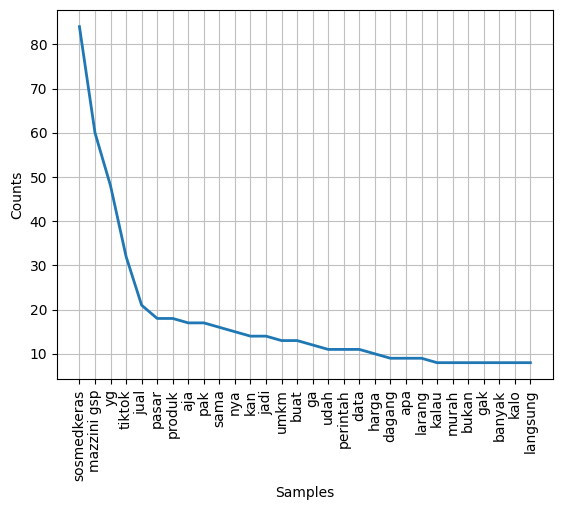

In [31]:
freq_dist.plot(30,cumulative=False)
plt.show()

In [32]:
# Simpan dataset bersih
data.to_csv("data_clean.csv", index=False)

#tfidf dan word frequency#

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

def classify_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Print classification report, confusion matrix, and accuracy score
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df['teks'], df['stemmed'], test_size=0.2, random_state=42)

# Convert training and test set to TF-IDF representation with Laplace Smoothing
vectorizer = TfidfVectorizer(smooth_idf=True, sublinear_tf=False)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Extract feature names
feature_names = vectorizer.get_feature_names_out()

# Create DataFrame to store TF-IDF values
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)

# Set display options for Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

# Display the DataFrame
print(tfidf_df)


        abang  actually        ad       ada  adaptasi        ae       aih       air       aja  \
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.230433   
3    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9    0.000000  0.000000  0.000